In [1]:
push!(LOAD_PATH, "..")

using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding

import NRLTB

### Plot hopping functions for Hamiltonian/overlap

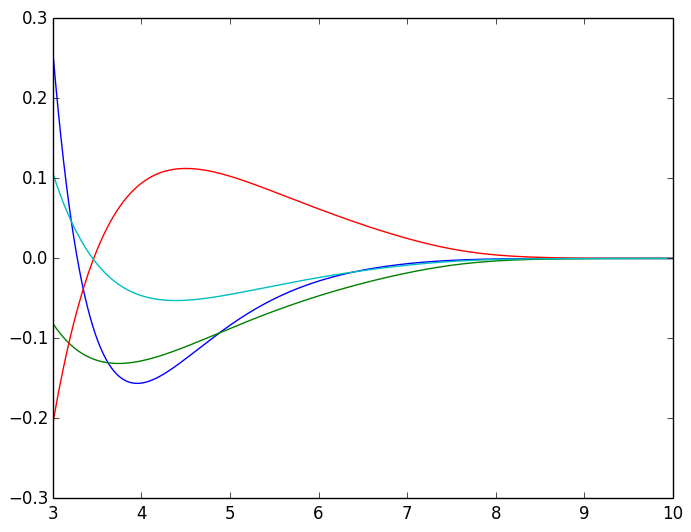

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x5e1fdd0>

In [4]:
reload("NRLTB")

x = 3.0:0.01:10.0
y1 = zeros(length(x))
y2 = zeros(length(x))
y3 = zeros(length(x))
y4 = zeros(length(x))
for k = 1:length(x)
    y1[k] = NRLTB.h_hop(x[k], 1, NRLTB.Si_sp)
    y2[k] = NRLTB.h_hop(x[k], 2, NRLTB.Si_sp)
    y3[k] = NRLTB.h_hop(x[k], 3, NRLTB.Si_sp)
    y4[k] = NRLTB.h_hop(x[k], 4, NRLTB.Si_sp)
end
plot(x,y1)
plot(x,y2)
plot(x,y3)
plot(x,y4)

## bond length of Aluminum

In [2]:
# create the supercell
n = 4

at = bulk("Al"; cubic=true)
at = repeat(at, (n, n, n))
X = positions(at)
print(length(at))

256

In [3]:
CELL = get_cell(at)

bond = CELL[1]/n

4.05

In [4]:
# set the fermi level

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.smearing.beta = 50

TightBinding.potential_energy(at, tbm)
tbm.fixed_eF = false
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

1.1849193989995597

In [ ]:
# compute total energy with different cell size

m = 12
x = zeros(m)
y = zeros(m)

for k = 1:m    
    ratio = 1.0 + (k-7) * 0.1
    println(ratio)
    set_positions!(at, X * ratio)
    set_cell!(at, CELL * ratio)
    
    x[k] = bond * ratio
    y[k] = TightBinding.potential_energy(at, tbm)
    println(ratio, y[k],"\n")
end

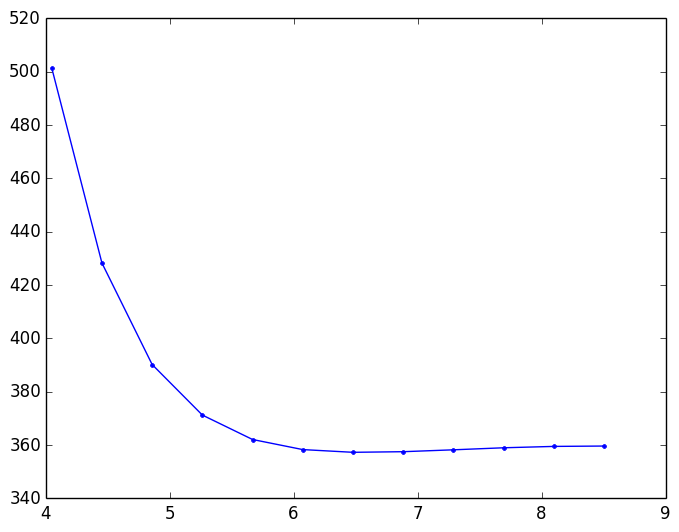

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x8b55350>

In [41]:
plot(x,y,".-")